In [2]:
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

### Step One: Missingness Analysis
Determine the amount of missingness at the patient level to determine whether patients should be excluded from imputation. 
1. Find the first lab value in the grouping of 5
2. Count if the value in that position is NA or has a value
3. In a new column for each lab value, record the number of missing values. Example: "crp_miss:2" would indicate that the patient has two missing crp values
4. Keep track of how many labs the paitent has no value at any time point. Example: create a column "no_data_count" that increments for the patient if 
there are no values across the five time points for a given lab. A patient with a no_data_count of 3 would indicate that there are three 
lab values that the patient has not even one recorded value. 
5. Out of the total 100 possible lab values, total number missing. 

Evaluate the missingness:
1. Visualize with a histogram the missingness count columns in IBD vs. healthy control

In [5]:
# all_labs = pd.read_excel('/Users/emmadyer/Desktop/ibd_long_project/data/all_ibd_lab_values.xlsx') # Desktop
all_labs = pd.read_excel('/Users/emmadyer/Desktop/long_ibd_data/data/all_ibd_lab_values.xlsx') # Macbook
#test_labs = pd.read_excel('/Users/emmadyer/Desktop/ibd_long_project/data/test_labs.xlsx')

In [6]:
def get_missing(df):
    '''
    Custom data cleaning function that calculates the number of 
    missing lab values for each patient. To use this function,
    the data must be formatted such that every patient is 
    one row, and there are 5 time points for each lab value where
    every value is labeled with a number at the end of the string AND
    the columns are from right to left in descending order. Example:
    column names would be 'crp5', 'crp4', 'crp3', 'crp2', 'crp1', 
    'alb5', 'alb4', ... etc. See example data for a sample of how 
    the data should be formatted to use this function.

    Input:
    df (DataFrame): DataFrame object to calculate missing values. 
    Must be formatted as described above. 
    
    Output:
    df (DataFrame): Modified DataFrame with additional columns that
    tally the number of missing values for each lab ('*_total_missing') as well as the 
    number of labs that have no values ('total_missing')
    '''
    col_names = list(df.columns)
    row_count = list(range(0, df.shape[0]))
    df_mask = df.isnull()

    for c in col_names:
        if c[-1] == '1':
            new_col = c[:-1] + "_total_missing"
            df[new_col] = 0

    df['total_missing'] = 0
    total_missing=0

    for r in row_count:
        no_values = 0
        for c in col_names:
            if c[-1] == '5':
                total_missing = 0
                new_col = c[:-1] + "_total_missing"
            if c[-1] in ['1','2','3','4','5']:
                if df_mask.loc[r, c] == True:
                    total_missing += 1
                    #print(c, 'is missing. Total missing: ', total_missing, '\n')
            if c[-1] == '1':
                if total_missing == 5:
                    no_values+=1
                df.loc[r, new_col] = total_missing
            if c == 'ast1':
                df.loc[r, 'total_missing'] = no_values
    return df

In [7]:
get_missing(all_labs)

,patient_id,ibd_disease_code,crp5,crp4,crp3,crp2,crp1,fer5,fer4,fer3,...,vtd_total_missing,hgb_total_missing,mcv_total_missing,hct_total_missing,wbc_total_missing,pmn_total_missing,plt_total_missing,ggt_total_missing,ast_total_missing,total_missing
0,2084003,1,NaN,NaN,NaN,NaN,9.70,NaN,NaN,NaN,...,5,3,3,3,3,3,3,5,4,6
1,2213566,1,NaN,NaN,NaN,NaN,1.79,NaN,NaN,NaN,...,5,4,4,4,4,4,4,5,4,4
2,2324622,1,NaN,NaN,NaN,0.45,NaN,NaN,NaN,12.0,...,4,1,1,1,1,1,1,5,4,1
3,2328209,1,NaN,NaN,NaN,2.20,4.70,NaN,NaN,NaN,...,5,2,2,2,2,2,2,5,3,4
4,1319833,1,NaN,NaN,NaN,NaN,0.45,NaN,NaN,NaN,...,5,4,4,4,4,4,4,4,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22837,104125,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5,5,5,5,5,5,5,5,5,20
22838,1213427,0,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,...,3,2,2,2,2,2,2,5,5,6
22839,1009752,0,0.0,0.0,NaN,NaN,NaN,29.0,40.0,50.0,...,2,0,0,0,0,0,0,5,5,4
22840,1001561,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.0,...,5,1,1,1,1,1,1,5,5,7


In [8]:
ibd_labs = all_labs.loc[all_labs['ibd_disease_code'] != 0]
healthy_labs = all_labs.loc[all_labs['ibd_disease_code'] == 0]

In [9]:
ibd_missing_only = ibd_labs.iloc[: , 102:-1]
healthy_missing_only = healthy_labs.iloc[: , 102:-1]

In [10]:
ibd_count_df = ibd_missing_only.apply(pd.value_counts)
ibd_count_df.reset_index(inplace=True)

healthy_count_df = healthy_missing_only.apply(pd.value_counts)
healthy_count_df.reset_index(inplace=True)


### Summary of Healthy Patient Lab Value Missingness

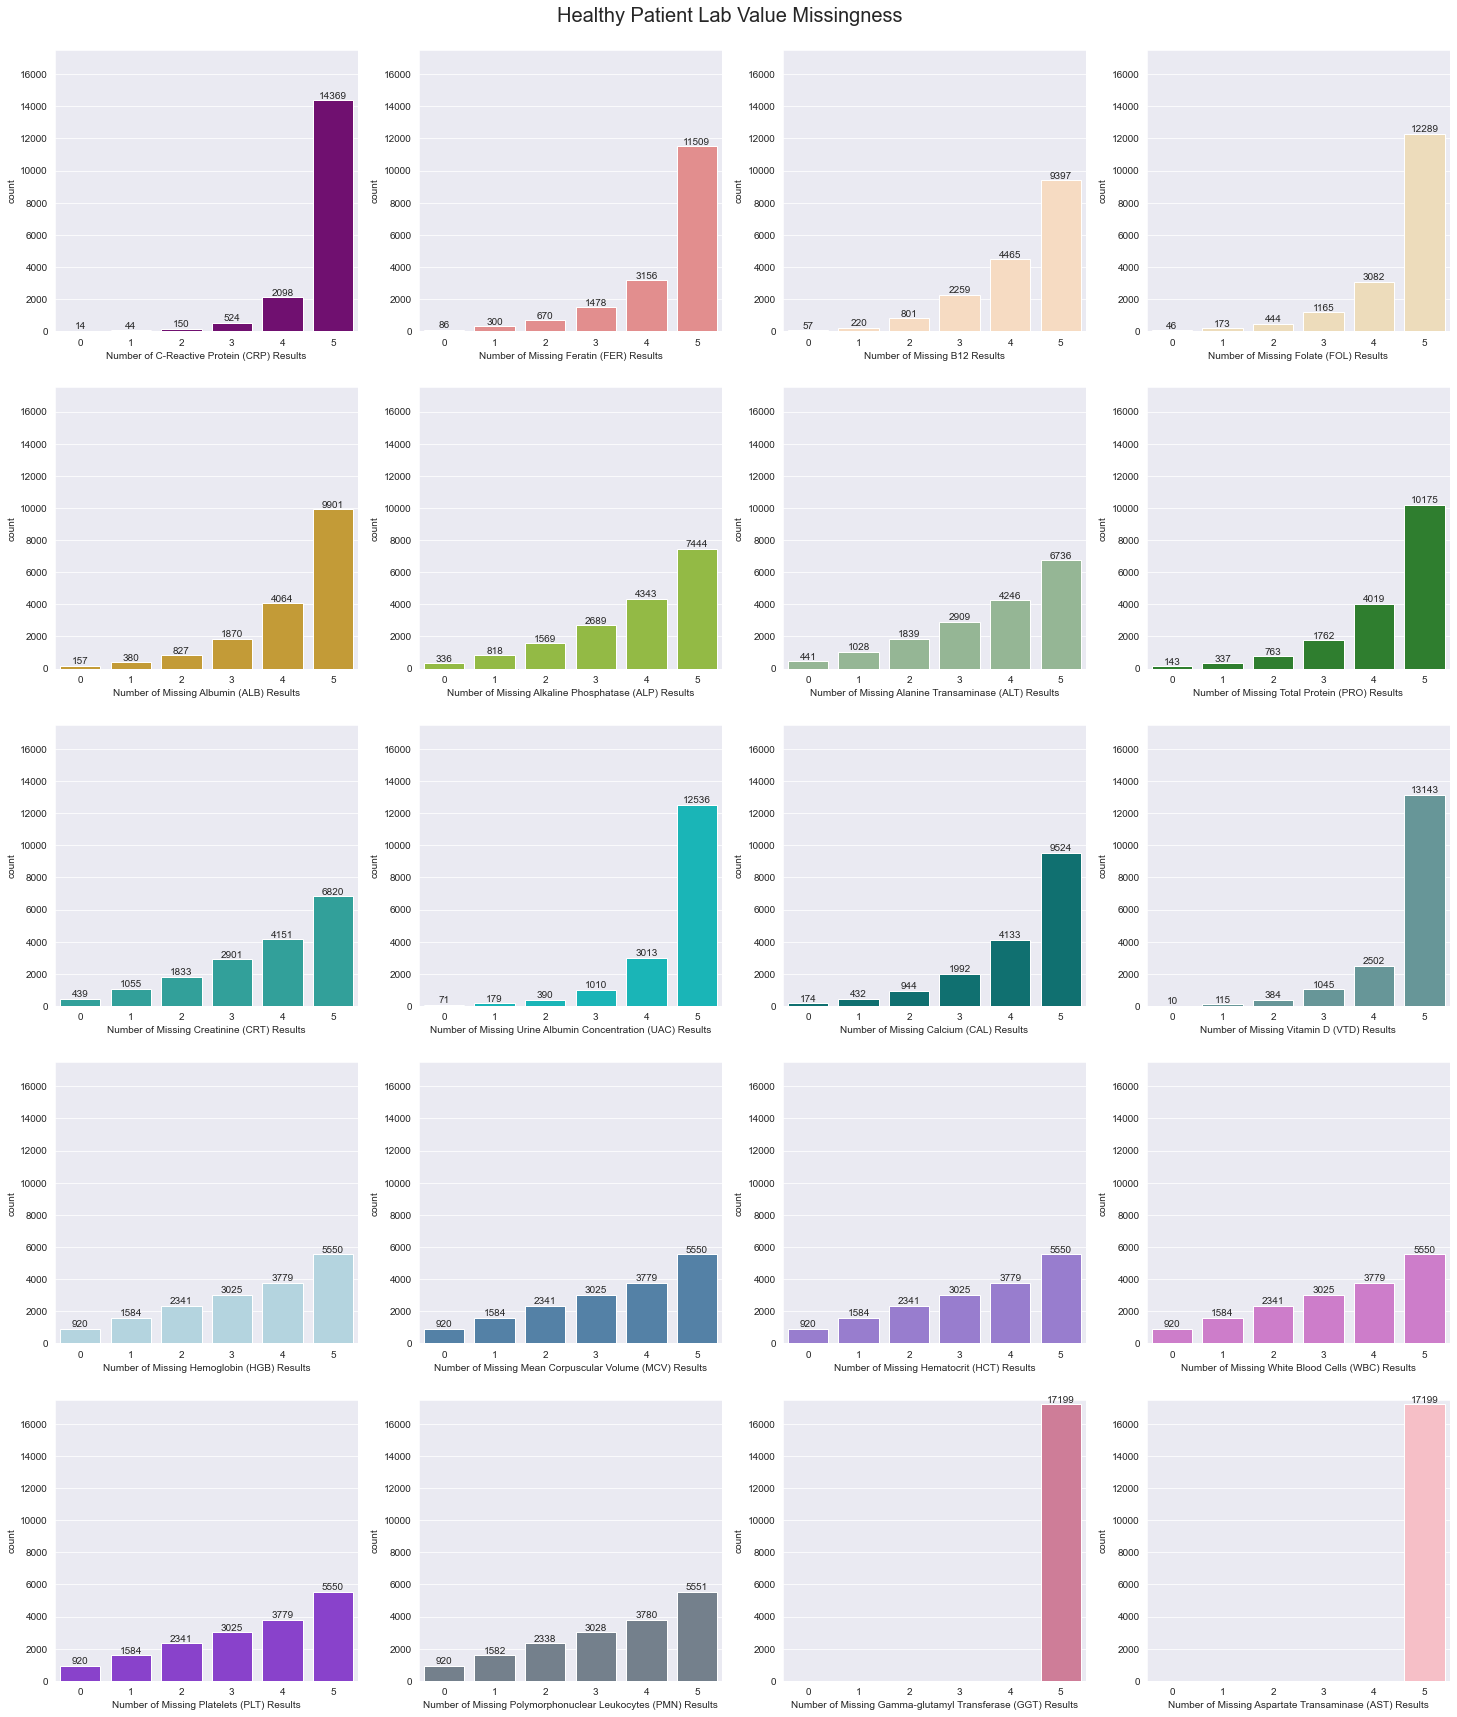

In [11]:
sns.set_style('darkgrid')
o = [0,1,2,3,4,5]

fig, axs = plt.subplots(ncols=4,nrows=5, figsize=(25,30))
fig.suptitle("Healthy Patient Lab Value Missingness", fontsize=20, y=0.90)
plt.setp(axs, ylim=(0,17500))

#CRP
crp_ax = sns.countplot(x=healthy_missing_only['crp_total_missing'], ax=axs[0,0], color='purple', order=o)
crp_ax.set_xlabel('Number of C-Reactive Protein (CRP) Results')
abs_values = healthy_missing_only['crp_total_missing'].value_counts(ascending=True).sort_index().values
crp_ax.bar_label(container=crp_ax.containers[0], labels=abs_values)

#FER
fer_ax = sns.countplot(x=healthy_missing_only['fer_total_missing'], ax=axs[0,1], color='lightcoral', order=o)
fer_ax.set_xlabel('Number of Missing Feratin (FER) Results')
abs_values = healthy_missing_only['fer_total_missing'].value_counts(ascending=True).sort_index().values
fer_ax.bar_label(container=fer_ax.containers[0], labels=abs_values)

#B12
b12_ax = sns.countplot(x=healthy_missing_only['btwelve_total_missing'], ax=axs[0,2], color='peachpuff', order=o)
b12_ax.set_xlabel('Number of Missing B12 Results')
abs_values = healthy_missing_only['btwelve_total_missing'].value_counts(ascending=True).sort_index().values
b12_ax.bar_label(container=b12_ax.containers[0], labels=abs_values)

#FOL
fol_ax = sns.countplot(x=healthy_missing_only['fol_total_missing'], ax=axs[0,3], color='wheat', order=o)
fol_ax.set_xlabel('Number of Missing Folate (FOL) Results')
abs_values = healthy_missing_only['fol_total_missing'].value_counts(ascending=True).sort_index().values
fol_ax.bar_label(container=fol_ax.containers[0], labels=abs_values)

#ALB
alb_ax = sns.countplot(x=healthy_missing_only['alb_total_missing'], ax=axs[1,0], color='goldenrod', order=o)
alb_ax.set_xlabel('Number of Missing Albumin (ALB) Results')
abs_values = healthy_missing_only['alb_total_missing'].value_counts(ascending=True).sort_index().values
alb_ax.bar_label(container=alb_ax.containers[0], labels=abs_values)

#ALP
alp_ax = sns.countplot(x=healthy_missing_only['alp_total_missing'], ax=axs[1,1], color='yellowgreen', order=o)
alp_ax.set_xlabel('Number of Missing Alkaline Phosphatase (ALP) Results')
abs_values = healthy_missing_only['alp_total_missing'].value_counts().abs_values = healthy_missing_only['alp_total_missing'].value_counts().sort_index().values
alp_ax.bar_label(container=alp_ax.containers[0], labels=abs_values)

#ALT
alt_ax = sns.countplot(x=healthy_missing_only['alt_total_missing'], ax=axs[1,2], color='darkseagreen', order=o)
alt_ax.set_xlabel('Number of Missing Alanine Transaminase (ALT) Results')
abs_values = healthy_missing_only['alt_total_missing'].value_counts(ascending=True).sort_index().values
alt_ax.bar_label(container=alt_ax.containers[0], labels=abs_values)

#PRO
pro_ax = sns.countplot(x=healthy_missing_only['pro_total_missing'], ax=axs[1,3], color='forestgreen', order=o)
pro_ax.set_xlabel('Number of Missing Total Protein (PRO) Results')
abs_values = healthy_missing_only['pro_total_missing'].value_counts(ascending=True).sort_index().values
pro_ax.bar_label(container=pro_ax.containers[0], labels=abs_values)

#CRT
crt_ax = sns.countplot(x=healthy_missing_only['crt_total_missing'], ax=axs[2,0], color='lightseagreen', order=o)
crt_ax.set_xlabel('Number of Missing Creatinine (CRT) Results')
abs_values = healthy_missing_only['crt_total_missing'].value_counts(ascending=True).sort_index().values
crt_ax.bar_label(container=crt_ax.containers[0], labels=abs_values)

#UAC
uac_ax = sns.countplot(x=healthy_missing_only['uac_total_missing'], ax=axs[2,1], color='darkturquoise', order=o)
uac_ax.set_xlabel('Number of Missing Urine Albumin Concentration (UAC) Results')
abs_values = healthy_missing_only['uac_total_missing'].value_counts(ascending=True).sort_index().values
uac_ax.bar_label(container=uac_ax.containers[0], labels=abs_values)

#CAL
cal_ax = sns.countplot(x=healthy_missing_only['cal_total_missing'], ax=axs[2,2], color='teal', order=o)
cal_ax.set_xlabel('Number of Missing Calcium (CAL) Results')
abs_values = healthy_missing_only['cal_total_missing'].value_counts(ascending=True).sort_index().values
cal_ax.bar_label(container=cal_ax.containers[0], labels=abs_values)

#VTD
vtd_ax = sns.countplot(x=healthy_missing_only['vtd_total_missing'], ax=axs[2,3], color='cadetblue', order=o)
vtd_ax.set_xlabel('Number of Missing Vitamin D (VTD) Results')
abs_values = healthy_missing_only['vtd_total_missing'].value_counts(ascending=True).sort_index().values
vtd_ax.bar_label(container=vtd_ax.containers[0], labels=abs_values)

#HGB
hgb_ax = sns.countplot(x=healthy_missing_only['hgb_total_missing'], ax=axs[3,0], color='lightblue', order=o)
hgb_ax.set_xlabel('Number of Missing Hemoglobin (HGB) Results')
abs_values = healthy_missing_only['hgb_total_missing'].value_counts(ascending=True).sort_index().values
hgb_ax.bar_label(container=hgb_ax.containers[0], labels=abs_values)

#MCV
mcv_ax = sns.countplot(x=healthy_missing_only['mcv_total_missing'], ax=axs[3,1], color='steelblue', order=o)
mcv_ax.set_xlabel('Number of Missing Mean Corpuscular Volume (MCV) Results')
abs_values = healthy_missing_only['mcv_total_missing'].value_counts(ascending=True).sort_index().values
mcv_ax.bar_label(container=mcv_ax.containers[0], labels=abs_values)

#HCT
hct_ax = sns.countplot(x=healthy_missing_only['hct_total_missing'], ax=axs[3,2], color='mediumpurple', order=o)
hct_ax.set_xlabel('Number of Missing Hematocrit (HCT) Results')
abs_values = healthy_missing_only['hct_total_missing'].value_counts(ascending=True).sort_index().values
hct_ax.bar_label(container=hct_ax.containers[0], labels=abs_values)

#WBC
wbc_ax = sns.countplot(x=healthy_missing_only['wbc_total_missing'], ax=axs[3,3], color='orchid', order=o)
wbc_ax.set_xlabel('Number of Missing White Blood Cells (WBC) Results')
abs_values = healthy_missing_only['wbc_total_missing'].value_counts(ascending=True).sort_index().values
wbc_ax.bar_label(container=wbc_ax.containers[0], labels=abs_values)

#PLT
wbc_ax = sns.countplot(x=healthy_missing_only['plt_total_missing'], ax=axs[4,0], color='blueviolet', order=o)
wbc_ax.set_xlabel('Number of Missing Platelets (PLT) Results')
abs_values = healthy_missing_only['plt_total_missing'].value_counts(ascending=True).sort_index().values
wbc_ax.bar_label(container=wbc_ax.containers[0], labels=abs_values)

#PMN
pmn_ax = sns.countplot(x=healthy_missing_only['pmn_total_missing'], ax=axs[4,1], color='slategrey', order=o)
pmn_ax.set_xlabel('Number of Missing Polymorphonuclear Leukocytes (PMN) Results')
abs_values = healthy_missing_only['pmn_total_missing'].value_counts(ascending=True).sort_index().values
pmn_ax.bar_label(container=pmn_ax.containers[0], labels=abs_values)

#GGT
ggt_ax = sns.countplot(x=healthy_missing_only['ggt_total_missing'], ax=axs[4,2], color='palevioletred', order=o)
ggt_ax.set_xlabel('Number of Missing Gamma-glutamyl Transferase (GGT) Results')
abs_values = healthy_missing_only['ggt_total_missing'].value_counts(ascending=True).sort_index().values
ggt_ax.bar_label(container=ggt_ax.containers[0], labels=abs_values)

#AST
ast_ax = sns.countplot(x=healthy_missing_only['ast_total_missing'], ax=axs[4,3], color='lightpink', order=o)
ast_ax.set_xlabel('Number of Missing Aspartate Transaminase (AST) Results')
abs_values = healthy_missing_only['ast_total_missing'].value_counts(ascending=True).sort_index().values
ast_ax.bar_label(container=ast_ax.containers[0], labels=abs_values)

fig.savefig('/Users/emmadyer/Desktop/ibd_long_project/figures/healthy_countplot.png', dpi=300, bbox_inches='tight')


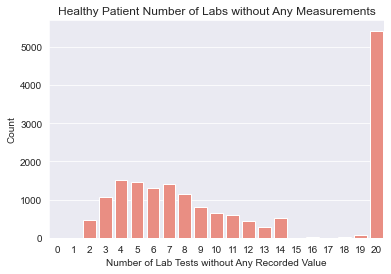

In [51]:
#All Missing Values
o = list(range(0,21))
all_ax = sns.countplot(x=healthy_labs['total_missing'], color='salmon', order=o)
all_ax.set_xlabel('Number of Lab Tests without Any Recorded Value')
#abs_values = ibd_missing_only['total_missing'].value_counts(ascending=True).sort_index().values
#all_ax.bar_label(container=all_ax.containers[0], labels=abs_values)
plt.setp(all_ax, ylabel='Count')
plt.title('Healthy Patient Number of Labs without Any Measurements')

plt.savefig('/Users/emmadyer/Desktop/ibd_long_project/figures/healthy_all_missing_countplot.png', dpi=300)

In [15]:
print(tabulate(healthy_count_df, headers='keys',tablefmt='simple_outline'))

┌────┬─────────┬─────────────────────┬─────────────────────┬─────────────────────────┬─────────────────────┬─────────────────────┬─────────────────────┬─────────────────────┬─────────────────────┬─────────────────────┬─────────────────────┬─────────────────────┬─────────────────────┬─────────────────────┬─────────────────────┬─────────────────────┬─────────────────────┬─────────────────────┬─────────────────────┬─────────────────────┬─────────────────────┐
│    │   index │   crp_total_missing │   fer_total_missing │   btwelve_total_missing │   fol_total_missing │   alb_total_missing │   alp_total_missing │   alt_total_missing │   pro_total_missing │   crt_total_missing │   uac_total_missing │   cal_total_missing │   vtd_total_missing │   hgb_total_missing │   mcv_total_missing │   hct_total_missing │   wbc_total_missing │   pmn_total_missing │   plt_total_missing │   ggt_total_missing │   ast_total_missing │
├────┼─────────┼─────────────────────┼─────────────────────┼──────────────────

In [31]:
# Calculate the total number of lab values that the patient has on record
healthy_missing_only['total_values_on_record'] = healthy_missing_only.iloc[:, :20].sum(axis=1)

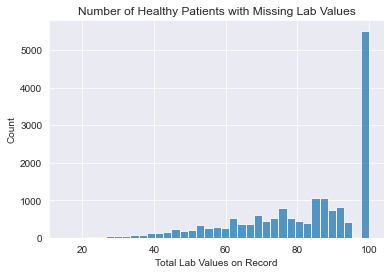

In [52]:
# Histogram of quartiles for the number of patients with missing lab values in each quartile

l = sns.histplot(data=healthy_missing_only, x='total_values_on_record')
plt.xlabel("Total Lab Values on Record")
plt.title("Number of Healthy Patients with Missing Lab Values")
plt.savefig('/Users/emmadyer/Desktop/ibd_long_project/figures/healthy_all_missing_histplot.png', dpi=300)

In [36]:
q1 = healthy_missing_only.loc[healthy_missing_only['total_values_on_record'] <= 25].shape[0]
q2 = healthy_missing_only.loc[(healthy_missing_only['total_values_on_record'] > 25) & (healthy_missing_only['total_values_on_record'] <= 50)].shape[0]
q3 = healthy_missing_only.loc[(healthy_missing_only['total_values_on_record'] > 50) & (healthy_missing_only['total_values_on_record'] <= 75)].shape[0]
q4 = healthy_missing_only.loc[(healthy_missing_only['total_values_on_record'] > 75) & (healthy_missing_only['total_values_on_record'] <= 99)].shape[0]
no_vals = healthy_missing_only.loc[healthy_missing_only['total_values_on_record'] == 100].shape[0]
quartiles = [q1, q2, q3, q4]
labels = ['1-24','25-49','50-74','75-100']

print(
    'Healthy Patients with no Lab Values: ', no_vals, '\n',
    'Healthy Patients with 1-24 Recorded Lab Values: ', q4, '\n',
    'Healthy Patients with 25-49 Recorded Lab Values: ', q3, '\n',
    'Healthy Patients with 50-74 Recorded Lab Values: ', q2, '\n',
    'Healthy Patients with 75-100 Recorded Lab Values', q1
)

Healthy Patients with no Lab Values:  5425 
 Healthy Patients with 1-24 Recorded Lab Values:  6100 
 Healthy Patients with 25-49 Recorded Lab Values:  4389 
 Healthy Patients with 50-74 Recorded Lab Values:  1237 
 Healthy Patients with 75-100 Recorded Lab Values 48


### Summary of IBD Patient Lab Value Missingness

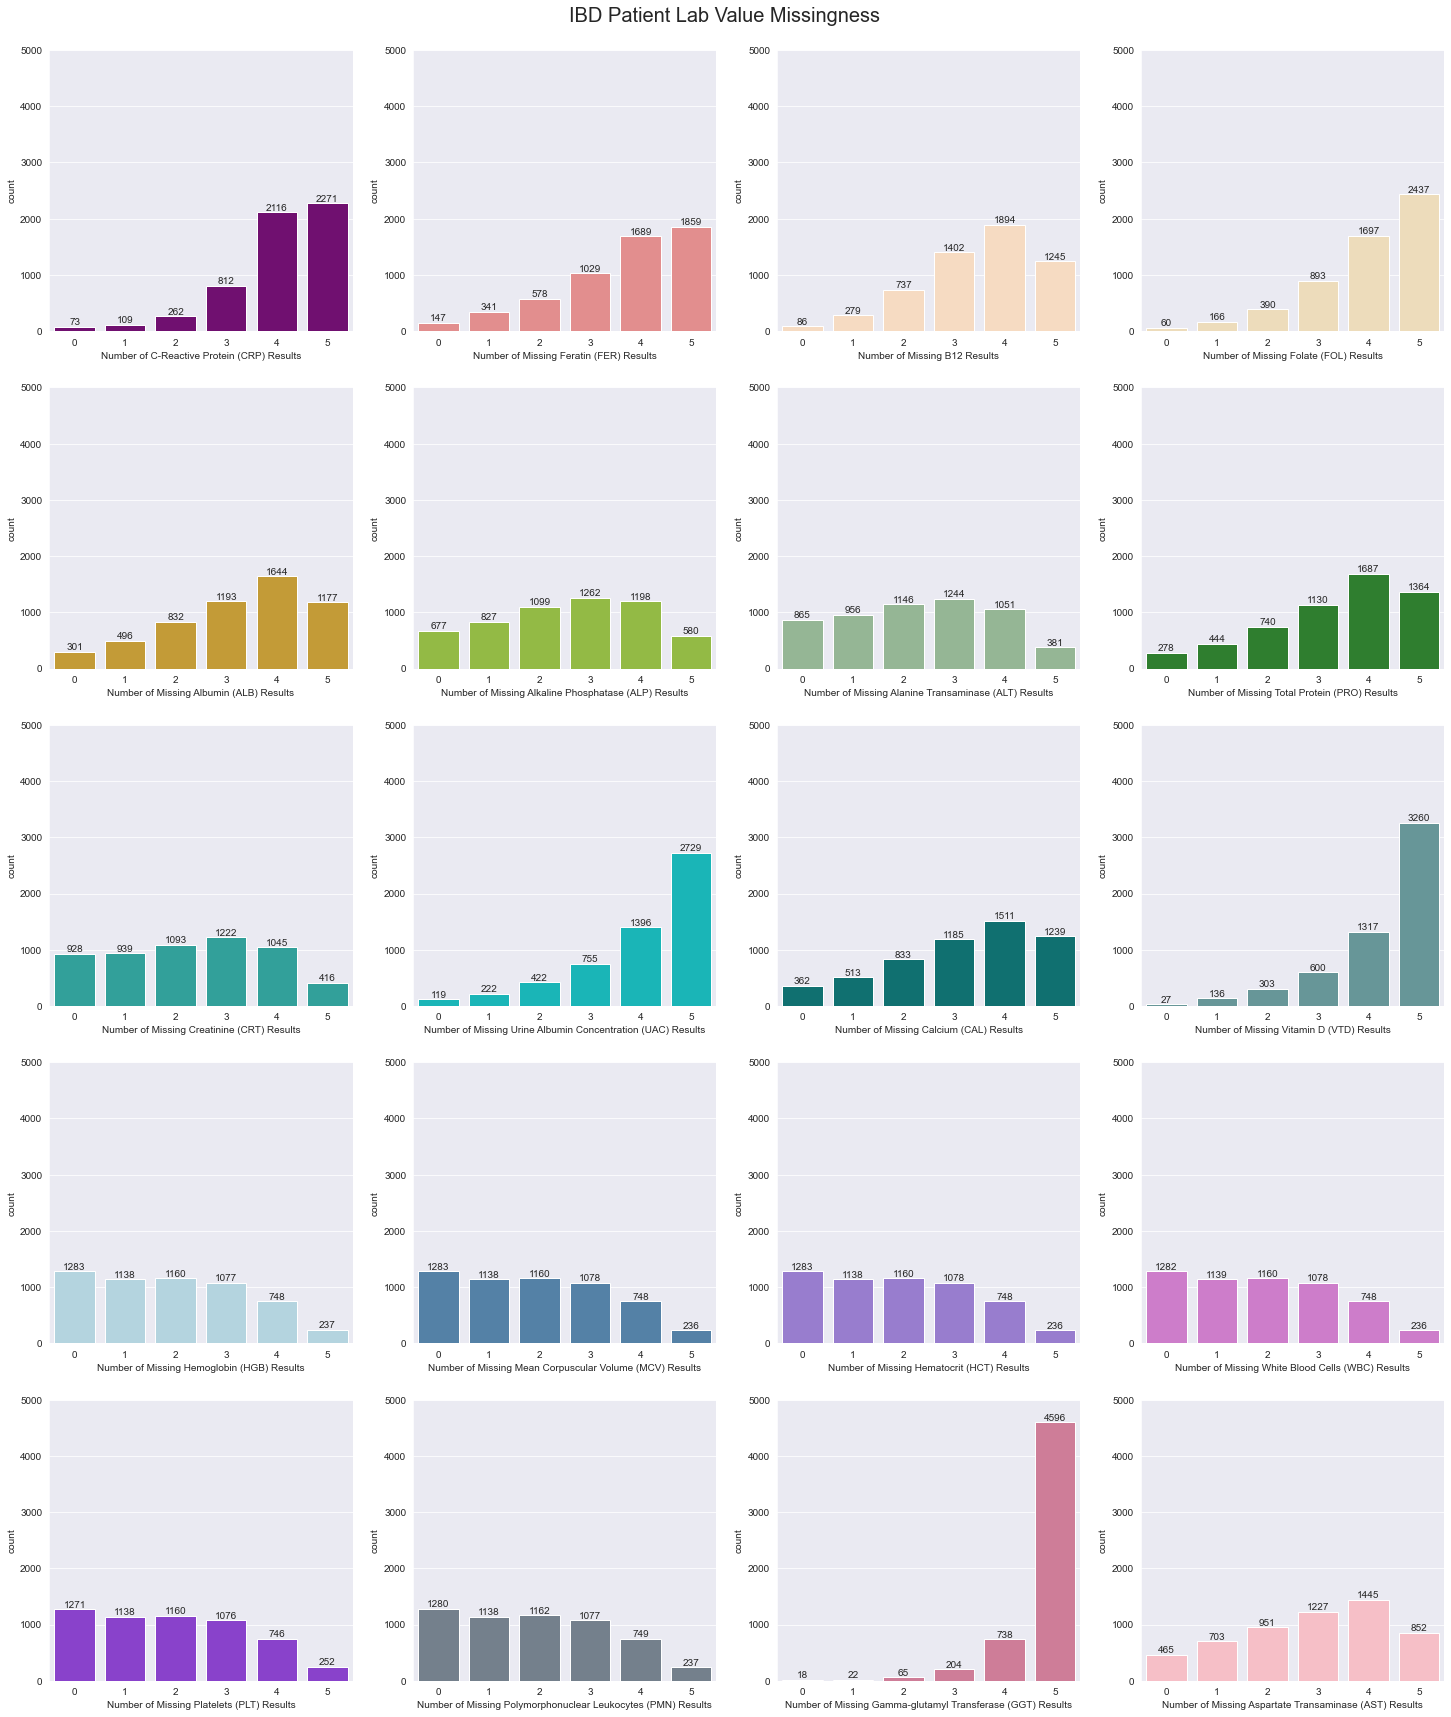

In [16]:
o = [0,1,2,3,4,5]

fig, axs = plt.subplots(ncols=4,nrows=5, figsize=(25,30))
fig.suptitle("IBD Patient Lab Value Missingness", fontsize=20, y=0.90)
plt.setp(axs, ylim=(0,5000))

#CRP
crp_ax = sns.countplot(x=ibd_missing_only['crp_total_missing'], ax=axs[0,0], color='purple', order=o)
crp_ax.set_xlabel('Number of C-Reactive Protein (CRP) Results')
abs_values = ibd_missing_only['crp_total_missing'].value_counts(ascending=True).sort_index().values
crp_ax.bar_label(container=crp_ax.containers[0], labels=abs_values)

#FER
fer_ax = sns.countplot(x=ibd_missing_only['fer_total_missing'], ax=axs[0,1], color='lightcoral', order=o)
fer_ax.set_xlabel('Number of Missing Feratin (FER) Results')
abs_values = ibd_missing_only['fer_total_missing'].value_counts(ascending=True).sort_index().values
fer_ax.bar_label(container=fer_ax.containers[0], labels=abs_values)

#B12
b12_ax = sns.countplot(x=ibd_missing_only['btwelve_total_missing'], ax=axs[0,2], color='peachpuff', order=o)
b12_ax.set_xlabel('Number of Missing B12 Results')
abs_values = ibd_missing_only['btwelve_total_missing'].value_counts(ascending=True).sort_index().values
b12_ax.bar_label(container=b12_ax.containers[0], labels=abs_values)

#FOL
fol_ax = sns.countplot(x=ibd_missing_only['fol_total_missing'], ax=axs[0,3], color='wheat', order=o)
fol_ax.set_xlabel('Number of Missing Folate (FOL) Results')
abs_values = ibd_missing_only['fol_total_missing'].value_counts(ascending=True).sort_index().values
fol_ax.bar_label(container=fol_ax.containers[0], labels=abs_values)

#ALB
alb_ax = sns.countplot(x=ibd_missing_only['alb_total_missing'], ax=axs[1,0], color='goldenrod', order=o)
alb_ax.set_xlabel('Number of Missing Albumin (ALB) Results')
abs_values = ibd_missing_only['alb_total_missing'].value_counts(ascending=True).sort_index().values
alb_ax.bar_label(container=alb_ax.containers[0], labels=abs_values)

#ALP
alp_ax = sns.countplot(x=ibd_missing_only['alp_total_missing'], ax=axs[1,1], color='yellowgreen', order=o)
alp_ax.set_xlabel('Number of Missing Alkaline Phosphatase (ALP) Results')
abs_values = ibd_missing_only['alp_total_missing'].value_counts().abs_values = ibd_missing_only['alp_total_missing'].value_counts().sort_index().values
alp_ax.bar_label(container=alp_ax.containers[0], labels=abs_values)

#ALT
alt_ax = sns.countplot(x=ibd_missing_only['alt_total_missing'], ax=axs[1,2], color='darkseagreen', order=o)
alt_ax.set_xlabel('Number of Missing Alanine Transaminase (ALT) Results')
abs_values = ibd_missing_only['alt_total_missing'].value_counts(ascending=True).sort_index().values
alt_ax.bar_label(container=alt_ax.containers[0], labels=abs_values)

#PRO
pro_ax = sns.countplot(x=ibd_missing_only['pro_total_missing'], ax=axs[1,3], color='forestgreen', order=o)
pro_ax.set_xlabel('Number of Missing Total Protein (PRO) Results')
abs_values = ibd_missing_only['pro_total_missing'].value_counts(ascending=True).sort_index().values
pro_ax.bar_label(container=pro_ax.containers[0], labels=abs_values)

#CRT
crt_ax = sns.countplot(x=ibd_missing_only['crt_total_missing'], ax=axs[2,0], color='lightseagreen', order=o)
crt_ax.set_xlabel('Number of Missing Creatinine (CRT) Results')
abs_values = ibd_missing_only['crt_total_missing'].value_counts(ascending=True).sort_index().values
crt_ax.bar_label(container=crt_ax.containers[0], labels=abs_values)

#UAC
uac_ax = sns.countplot(x=ibd_missing_only['uac_total_missing'], ax=axs[2,1], color='darkturquoise', order=o)
uac_ax.set_xlabel('Number of Missing Urine Albumin Concentration (UAC) Results')
abs_values = ibd_missing_only['uac_total_missing'].value_counts(ascending=True).sort_index().values
uac_ax.bar_label(container=uac_ax.containers[0], labels=abs_values)

#CAL
cal_ax = sns.countplot(x=ibd_missing_only['cal_total_missing'], ax=axs[2,2], color='teal', order=o)
cal_ax.set_xlabel('Number of Missing Calcium (CAL) Results')
abs_values = ibd_missing_only['cal_total_missing'].value_counts(ascending=True).sort_index().values
cal_ax.bar_label(container=cal_ax.containers[0], labels=abs_values)

#VTD
vtd_ax = sns.countplot(x=ibd_missing_only['vtd_total_missing'], ax=axs[2,3], color='cadetblue', order=o)
vtd_ax.set_xlabel('Number of Missing Vitamin D (VTD) Results')
abs_values = ibd_missing_only['vtd_total_missing'].value_counts(ascending=True).sort_index().values
vtd_ax.bar_label(container=vtd_ax.containers[0], labels=abs_values)

#HGB
hgb_ax = sns.countplot(x=ibd_missing_only['hgb_total_missing'], ax=axs[3,0], color='lightblue', order=o)
hgb_ax.set_xlabel('Number of Missing Hemoglobin (HGB) Results')
abs_values = ibd_missing_only['hgb_total_missing'].value_counts(ascending=True).sort_index().values
hgb_ax.bar_label(container=hgb_ax.containers[0], labels=abs_values)

#MCV
mcv_ax = sns.countplot(x=ibd_missing_only['mcv_total_missing'], ax=axs[3,1], color='steelblue', order=o)
mcv_ax.set_xlabel('Number of Missing Mean Corpuscular Volume (MCV) Results')
abs_values = ibd_missing_only['mcv_total_missing'].value_counts(ascending=True).sort_index().values
mcv_ax.bar_label(container=mcv_ax.containers[0], labels=abs_values)

#HCT
hct_ax = sns.countplot(x=ibd_missing_only['hct_total_missing'], ax=axs[3,2], color='mediumpurple', order=o)
hct_ax.set_xlabel('Number of Missing Hematocrit (HCT) Results')
abs_values = ibd_missing_only['hct_total_missing'].value_counts(ascending=True).sort_index().values
hct_ax.bar_label(container=hct_ax.containers[0], labels=abs_values)

#WBC
wbc_ax = sns.countplot(x=ibd_missing_only['wbc_total_missing'], ax=axs[3,3], color='orchid', order=o)
wbc_ax.set_xlabel('Number of Missing White Blood Cells (WBC) Results')
abs_values = ibd_missing_only['wbc_total_missing'].value_counts(ascending=True).sort_index().values
wbc_ax.bar_label(container=wbc_ax.containers[0], labels=abs_values)

#PLT
wbc_ax = sns.countplot(x=ibd_missing_only['plt_total_missing'], ax=axs[4,0], color='blueviolet', order=o)
wbc_ax.set_xlabel('Number of Missing Platelets (PLT) Results')
abs_values = ibd_missing_only['plt_total_missing'].value_counts(ascending=True).sort_index().values
wbc_ax.bar_label(container=wbc_ax.containers[0], labels=abs_values)

#PMN
pmn_ax = sns.countplot(x=ibd_missing_only['pmn_total_missing'], ax=axs[4,1], color='slategrey', order=o)
pmn_ax.set_xlabel('Number of Missing Polymorphonuclear Leukocytes (PMN) Results')
abs_values = ibd_missing_only['pmn_total_missing'].value_counts(ascending=True).sort_index().values
pmn_ax.bar_label(container=pmn_ax.containers[0], labels=abs_values)

#GGT
ggt_ax = sns.countplot(x=ibd_missing_only['ggt_total_missing'], ax=axs[4,2], color='palevioletred', order=o)
ggt_ax.set_xlabel('Number of Missing Gamma-glutamyl Transferase (GGT) Results')
abs_values = ibd_missing_only['ggt_total_missing'].value_counts(ascending=True).sort_index().values
ggt_ax.bar_label(container=ggt_ax.containers[0], labels=abs_values)

#AST
ast_ax = sns.countplot(x=ibd_missing_only['ast_total_missing'], ax=axs[4,3], color='lightpink', order=o)
ast_ax.set_xlabel('Number of Missing Aspartate Transaminase (AST) Results')
abs_values = ibd_missing_only['ast_total_missing'].value_counts(ascending=True).sort_index().values
ast_ax.bar_label(container=ast_ax.containers[0], labels=abs_values)

fig.savefig('/Users/emmadyer/Desktop/ibd_long_project/figures/countplot.png', dpi=300, bbox_inches='tight')


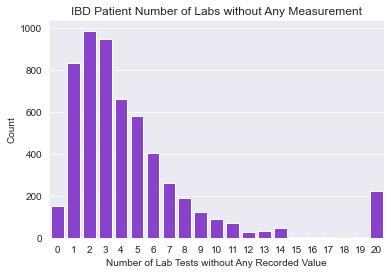

In [49]:
#All Missing Values
o = list(range(0,21))
all_ax = sns.countplot(x=ibd_labs['total_missing'], color='blueviolet', order=o)
all_ax.set_xlabel('Number of Lab Tests without Any Recorded Value')
#abs_values = ibd_missing_only['total_missing'].value_counts(ascending=True).sort_index().values
#all_ax.bar_label(container=all_ax.containers[0], labels=abs_values)
plt.setp(all_ax, ylabel='Count')
plt.title('IBD Patient Number of Labs without Any Measurement')

plt.savefig('/Users/emmadyer/Desktop/ibd_long_project/figures/all_missing_countplot.png', dpi=300)

In [18]:
print(tabulate(ibd_count_df, headers='keys',tablefmt='simple_outline'))

┌────┬─────────┬─────────────────────┬─────────────────────┬─────────────────────────┬─────────────────────┬─────────────────────┬─────────────────────┬─────────────────────┬─────────────────────┬─────────────────────┬─────────────────────┬─────────────────────┬─────────────────────┬─────────────────────┬─────────────────────┬─────────────────────┬─────────────────────┬─────────────────────┬─────────────────────┬─────────────────────┬─────────────────────┐
│    │   index │   crp_total_missing │   fer_total_missing │   btwelve_total_missing │   fol_total_missing │   alb_total_missing │   alp_total_missing │   alt_total_missing │   pro_total_missing │   crt_total_missing │   uac_total_missing │   cal_total_missing │   vtd_total_missing │   hgb_total_missing │   mcv_total_missing │   hct_total_missing │   wbc_total_missing │   pmn_total_missing │   plt_total_missing │   ggt_total_missing │   ast_total_missing │
├────┼─────────┼─────────────────────┼─────────────────────┼──────────────────

In [29]:
# Calculate the total number of lab values that the patient has on record
ibd_missing_only['total_values_on_record'] = ibd_missing_only.iloc[:, :20].sum(axis=1)

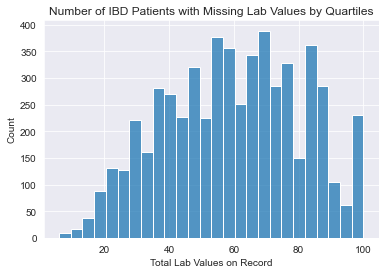

In [50]:
# Histogram of quartiles for the number of patients with missing lab values in each quartile

l = sns.histplot(data=ibd_missing_only, x='total_values_on_record')
plt.xlabel("Total Lab Values on Record")
plt.title("Number of IBD Patients with Missing Lab Values by Quartiles")
plt.savefig('/Users/emmadyer/Desktop/ibd_long_project/figures/ibd_all_missing_histplot.png', dpi=300)


In [25]:
q1 = ibd_missing_only.loc[ibd_missing_only['total_values_on_record'] <= 25].shape[0]
q2 = ibd_missing_only.loc[(ibd_missing_only['total_values_on_record'] > 25) & (ibd_missing_only['total_values_on_record'] <= 50)].shape[0]
q3 = ibd_missing_only.loc[(ibd_missing_only['total_values_on_record'] > 50) & (ibd_missing_only['total_values_on_record'] <= 75)].shape[0]
q4 = ibd_missing_only.loc[(ibd_missing_only['total_values_on_record'] > 75) & (ibd_missing_only['total_values_on_record'] <= 99)].shape[0]
no_vals = ibd_missing_only.loc[ibd_missing_only['total_values_on_record'] == 100].shape[0]
quartiles = (q1, q2, q3, q4)

print(
    'IBD Patients with no Lab Values: ', no_vals, '\n',
    'IBD Patients with 1-24 Recorded Lab Values: ', q4, '\n',
    'IBD Patients with 25-49 Recorded Lab Values: ', q3, '\n',
    'IBD Patients with 50-74 Recorded Lab Values: ', q2, '\n',
    'IBD Patients with 75-100 Recorded Lab Values', q1
)


IBD Patients with no Lab Values:  223 
 IBD Patients with 1-24 Recorded Lab Values:  1194 
 IBD Patients with 25-49 Recorded Lab Values:  2260 
 IBD Patients with 50-74 Recorded Lab Values:  1649 
 IBD Patients with 75-100 Recorded Lab Values 317


### Reduce Datasets Based on Missingness

In [12]:
# Get the total number of missing labs for the full dataset with the lab values

# IBD Patients
# Calculate the total number of lab values that the patient has on record
ibd_labs['total_values_on_record'] = ibd_labs.iloc[:, 102:122].sum(axis=1)

# Remove patients that have 40 or fewer lab measurements (out of 100 possible measurements)
reduced_ibd_labs = ibd_labs[ibd_labs['total_values_on_record'] < 60]

# No healthy controls have GGT or AST records, therefore drop these tests because there is no comparison group
labs_only_ibd_reduced = reduced_ibd_labs.iloc[:, :92]

labs_only_ibd_reduced.to_csv('/Users/emmadyer/Desktop/long_ibd_data/data/reduced/v2_ibd_reduced.csv', index=False)

/var/folders/ps/bqjzsfrx7m586gbdsy_96rpm0000gn/T/ipykernel_8228/810957914.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ibd_labs['total_values_on_record'] = ibd_labs.iloc[:, 102:122].sum(axis=1)


In [13]:
# Get the total number of missing labs for the full dataset with the lab values

# Healthy Patients 
healthy_labs['total_values_on_record'] = healthy_labs.iloc[:, 102:122].sum(axis=1)

# Remove patients that have 40 or fewer lab measurements (out of 100 possible measurements)
reduced_healthy_labs = healthy_labs[healthy_labs['total_values_on_record'] < 60]

# No healthy controls have GGT or AST records, therefore drop these tests because there is no comparison group
labs_only_healthy_reduced = reduced_healthy_labs.iloc[:, :92]

labs_only_healthy_reduced.to_csv('/Users/emmadyer/Desktop/long_ibd_data/data/reduced/v2_healthy_reduced.csv', index=False)

/var/folders/ps/bqjzsfrx7m586gbdsy_96rpm0000gn/T/ipykernel_8228/1998924283.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  healthy_labs['total_values_on_record'] = healthy_labs.iloc[:, 102:122].sum(axis=1)
